In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime, date

sns.set_style('darkgrid')
%matplotlib inline

## **Limpieza/formateo**

In [146]:
Postulaciones_Edad = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
Postulaciones_Estudios= pd.read_csv('../data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

In [147]:
print ("Existen ", len(Postulaciones_Estudios), " registros con estudios")
print ("Existen ", len(Postulaciones_Edad), " registros con sexo y genero")

print("El", round(100 * Postulaciones_Estudios['idpostulante'].isnull().sum()/len(Postulaciones_Estudios), 2), "% de los datos de la columna idpostulante del set de estudios son nulos")
print("El", round(100 * Postulaciones_Edad['idpostulante'].isnull().sum()/len(Postulaciones_Edad), 2), "% de los datos de la columna idpostulante del set de edades son nulos")

Existen  298231  registros con estudios
Existen  200888  registros con sexo y genero
El 0.0 % de los datos de la columna idpostulante del set de estudios son nulos
El 0.0 % de los datos de la columna idpostulante del set de edades son nulos


In [148]:
Postulaciones_Estudios['idpostulante'].value_counts()

YlMLGD     9
EZD29      8
54MQGz     8
12eO0B     7
aa1KkD     7
Ee2ok0     7
zv8vOxE    7
8KOd6x     7
9692125    7
xk9VKeV    7
kPNrbZV    7
YNVjEr     7
8M21pBL    7
55R18N     7
Ez0LBk9    7
8keBRO     7
1BodWQ     7
8AZKkO     6
3NkbZwr    6
owarwYZ    6
2zLX4QY    6
2zmO1dY    6
ow5oYE4    6
e9BNrp     6
jk6WmM6    6
EzZv6Jo    6
6r5m8zr    6
1ZYPM3     6
63Rmv4     6
5JZzxZ     6
          ..
Nzr8964    1
bOVw2zB    1
VNrQ0QN    1
QNr4dOq    1
ow2pm8Z    1
pzdbrkM    1
BmDM0Bw    1
jk5rmeB    1
zvxNdYD    1
VNr841E    1
Eqx14z     1
OqP61b6    1
aGpaZq     1
KBdP0Bj    1
ekObL6r    1
bOjlrRB    1
kPBoX0j    1
YjNpK8D    1
W9Wr3PX    1
qe2MpKk    1
zvaZ05K    1
MVr3q8K    1
akj8rYN    1
ow2daQL    1
a5NDq0     1
5mP4M1w    1
wVYXkDp    1
ekNXml2    1
8QNqzD     1
QNr1el4    1
Name: idpostulante, Length: 188752, dtype: int64

In [149]:
Postulaciones_Estudios.loc[Postulaciones_Estudios['idpostulante'] == 'YlMLGD']

,idpostulante,nombre,estado
373,YlMLGD,Terciario/Técnico,En Curso
374,YlMLGD,Otro,En Curso
375,YlMLGD,Universitario,En Curso
2206,YlMLGD,Terciario/Técnico,Graduado
2207,YlMLGD,Universitario,Graduado
2208,YlMLGD,Otro,Graduado
2209,YlMLGD,Posgrado,Graduado
3659,YlMLGD,Universitario,Abandonado
3660,YlMLGD,Terciario/Técnico,Abandonado


In [150]:
def cuantificar_estudios(row):
    if (row['nombre'] == 'Doctorado'):
        row['nombre'] = 7
    if (row['nombre'] == 'Master'):    
        row['nombre'] = 6
    if (row['nombre'] == 'Posgrado'):    
        row['nombre'] = 5
    if (row['nombre'] == 'Universitario'):    
        row['nombre'] = 4
    if (row['nombre'] == 'Terciario/Técnico'):    
        row['nombre'] = 3
    if (row['nombre'] == 'Secundario'):    
        row['nombre'] = 2
    if (row['nombre'] == 'Otro'):    
        row['nombre'] = 1    
        
    if (row['estado'] == 'Graduado'):
        row['estado'] = 3
    if (row['estado'] == 'En Curso'):    
        row['estado'] = 2
    if (row['estado'] == 'Abandonado'):    
        row['estado'] = 1
        
    return row    

def descuantificar_estudios(row):
    if (row['nombre'] == 7):
        row['nombre'] = 'Doctorado'
    if (row['nombre'] == 6):    
        row['nombre'] = 'Master'
    if (row['nombre'] == 5):    
        row['nombre'] = 'Posgrado'
    if (row['nombre'] == 4):    
        row['nombre'] = 'Universitario'
    if (row['nombre'] == 3):    
        row['nombre'] = 'Terciario/Técnico'
    if (row['nombre'] == 2):    
        row['nombre'] = 'Secundario'
    if (row['nombre'] == 1):    
        row['nombre'] = 'Otro'    
        
    if (row['estado'] == 3):
        row['estado'] = 'Graduado'
    if (row['estado'] == 2):    
        row['estado'] = 'En Curso'
    if (row['estado'] == 1):    
        row['estado'] = 'Abandonado'
        
    return row    

In [151]:
Postulaciones_Estudios.apply(lambda row: cuantificar_estudios(row), axis=1)
Postulaciones_Estudios.head(1)

,idpostulante,nombre,estado
0,NdJl,5,2


In [152]:
grouped_postulantes = Postulaciones_Estudios.groupby('idpostulante')

In [153]:
print('Existen ', len(grouped_postulantes), ' postulantes diferentes con estudios registrados')

Existen  188752  postulantes diferentes con estudios registrados


In [154]:
grouped_postulantes = Postulaciones_Estudios.groupby('idpostulante').apply(lambda g: g.sort_index(by='nombre', ascending=False).head(1))

/home/tbotalla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [155]:
grouped_postulantes.reset_index(drop=True, inplace=True)
Postulaciones_Estudios = grouped_postulantes
Postulaciones_Estudios.apply(lambda row: descuantificar_estudios(row), axis=1)
Postulaciones_Estudios.loc[grouped_postulantes['idpostulante'] == 'YlMLGD']

,idpostulante,nombre,estado
117605,YlMLGD,Posgrado,Graduado


In [156]:
postulantes = pd.merge(Postulaciones_Estudios, Postulaciones_Edad, on =['idpostulante'])

In [157]:
postulantes.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC


In [158]:
del Postulaciones_Estudios
del Postulaciones_Edad

## **Edad y Género**

In [159]:
postulantes['sexo'].value_counts()

FEM           97003
MASC          89016
NO_DECLARA     2733
Name: sexo, dtype: int64

### **Limpieza**

In [160]:
postulantes['fechanacimiento'].isnull().sum()

2874

In [161]:
postulantes = postulantes.dropna().reset_index()
del postulantes['index']

In [162]:
postulantes['fechanacimiento'].isnull().sum()

0

In [163]:
postulantes.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC


In [164]:
postulantes['fechanacimiento']= pd.to_datetime(postulantes['fechanacimiento'],errors = 'coerce', format='%Y-%m-%d')

In [165]:
postulantes = postulantes.dropna().reset_index()

In [166]:
postulantes['sexo'].value_counts()

FEM           96729
MASC          88732
NO_DECLARA      411
Name: sexo, dtype: int64

In [167]:
def calculate_age(year, month, day):
    today = date.today()
    return today.year - year - ((today.month, today.day) < (month, day))

postulantes['edad'] = postulantes['fechanacimiento'].map(lambda x: calculate_age(x.year,x.month,x.day))

In [168]:
postulantes.dtypes

index                       int64
idpostulante               object
nombre                     object
estado                     object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

In [169]:
postulantes['edad'].isnull().sum()

0

In [170]:
postulantes = postulantes.dropna().reset_index()

In [171]:
postulantes['edad'] = postulantes['edad'].astype(int)
del postulantes['index']

In [172]:
postulantes.dtypes

level_0                     int64
idpostulante               object
nombre                     object
estado                     object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

### **Postulantes con edad de jubilación**

In [173]:
edad_jubilacion_fem=60
edad_jubilacion_masc=65
edad_legal=18
cantidad_postulantes_fem=len(postulantes.loc[postulantes['sexo'] == 'FEM'])
cantidad_postulantes_masc=len(postulantes.loc[postulantes['sexo'] == 'MASC'])

In [174]:
postulantes_jubilables_fem = postulantes.loc[postulantes['edad'] > edad_jubilacion_fem]
postulantes_jubilables_fem = postulantes_jubilables_fem.loc[postulantes_jubilables_fem['sexo'] == 'FEM']
postulantes_jubilables_fem.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
1253,1253,0zP3W2r,Secundario,Graduado,1950-08-26,FEM,67
1916,1916,0zPRGGd,Secundario,Graduado,1954-01-22,FEM,64
5018,5018,144z5B,Posgrado,Graduado,1957-03-21,FEM,61


In [175]:
print('El ', round(100 * len(postulantes_jubilables_fem)/cantidad_postulantes_fem, 2), '% de las postulantes mujeres están en edad de jubilación')

El  0.11 % de las postulantes mujeres están en edad de jubilación


In [176]:
postulantes_jubilables_masc = postulantes.loc[postulantes['edad'] > edad_jubilacion_masc]
postulantes_jubilables_masc = postulantes_jubilables_masc.loc[postulantes_jubilables_masc['sexo'] == 'MASC']
postulantes_jubilables_masc.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
19559,19559,4rePXEA,Doctorado,Graduado,1949-06-15,MASC,68
20259,20259,52DWRk,Universitario,Graduado,1946-12-03,MASC,71
20889,20889,59rBOv,Universitario,Abandonado,1951-01-01,MASC,67


In [177]:
print('El ', round(100 * len(postulantes_jubilables_masc)/cantidad_postulantes_masc, 2), '% de los postulantes hombres están en edad de jubilación')

El  0.08 % de los postulantes hombres están en edad de jubilación


### **Postulantes menores de edad**

In [178]:
postulantes_menores = postulantes.loc[postulantes['edad'] < edad_legal]
postulantes_menores.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
911,911,0zNWeJM,Secundario,Graduado,2000-05-16,FEM,17
1127,1127,0zP1Xaq,Secundario,Graduado,2000-04-17,FEM,17
1416,1416,0zP9Nxr,Secundario,Graduado,2000-06-02,FEM,17


In [179]:
print('El ', round(100 * len(postulantes_menores)/len(postulantes), 2), '% de los postulantes son menores de edad')

El  0.06 % de los postulantes son menores de edad


In [180]:
print('Representan el ', round(100 * (len(postulantes_menores) + len(postulantes_jubilables_fem) + len(postulantes_jubilables_masc))/len(postulantes), 2), '% del total de postulantes')

Representan el  0.16 % del total de postulantes


### **Distribución edades**

In [181]:
postulantes['edad'].value_counts()

26     11593
25     11365
24     11153
27     11081
23     10910
22     10323
28      9563
21      9197
29      9118
30      8048
31      7544
20      7367
32      6622
33      5674
19      5394
34      5302
35      4833
36      4568
37      3982
38      3690
39      3282
40      2870
41      2496
18      2373
42      2206
43      2008
44      1609
45      1411
46      1384
47      1208
       ...  
52       608
53       598
54       544
55       442
56       426
57       356
58       268
59       228
61       174
60       152
17       119
62       102
63        65
64        44
67        30
65        24
66        17
68        14
69         6
70         6
75         5
71         3
73         2
242        1
100        1
74         1
76         1
78         1
96         1
12         1
Name: edad, Length: 64, dtype: int64

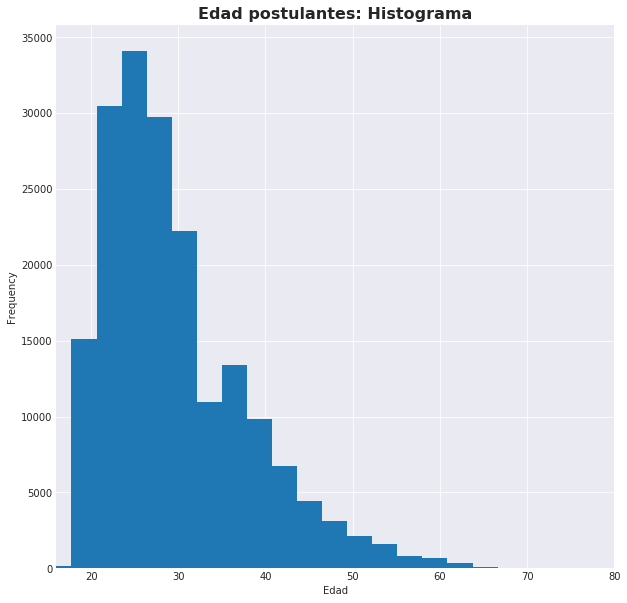

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
postulantes['edad'].plot.hist(figsize=[10,10], bins=80)

In [183]:
P_Masculino_Edad = postulantes[postulantes['sexo']=='MASC']

In [189]:
len(P_Masculino_Edad)

88732

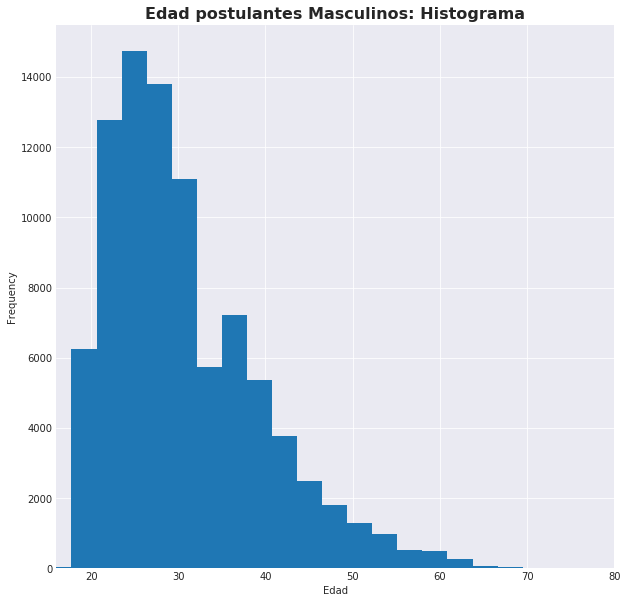

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes Masculinos: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
P_Masculino_Edad['edad'].plot.hist(figsize=[10,10], bins=80)

In [185]:
P_Femenino_Edad = postulantes[postulantes['sexo']=='FEM']

In [188]:
len(P_Femenino_Edad)

96729

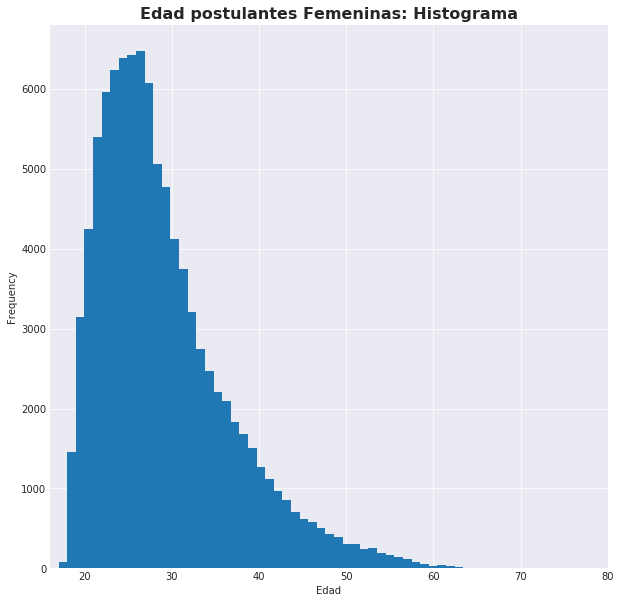

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes Femeninas: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
P_Femenino_Edad['edad'].plot.hist(figsize=[10,10], bins=80)

## Estudios

In [124]:
postulantes.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
0,0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC,30
1,1,0zB026d,Terciario/Técnico,Graduado,1978-02-23,FEM,40
2,2,0zB03O9,Terciario/Técnico,En Curso,1987-07-04,FEM,30


In [125]:
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185872 entries, 0 to 185871
Data columns (total 7 columns):
level_0            185872 non-null int64
idpostulante       185872 non-null object
nombre             185872 non-null object
estado             185872 non-null object
fechanacimiento    185872 non-null datetime64[ns]
sexo               185872 non-null object
edad               185872 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 9.9+ MB


In [126]:
postulantes['nombre'].value_counts()

Universitario        86754
Secundario           61097
Terciario/Técnico    27046
Posgrado              6010
Master                3454
Otro                  1303
Doctorado              208
Name: nombre, dtype: int64

In [127]:
postulantes['estado'].value_counts()

Graduado      102442
En Curso       67428
Abandonado     16002
Name: estado, dtype: int64

In [128]:
Postulaciones_Graduados = postulantes
Postulaciones_Graduados['cantidad']=0
Postulaciones_Graduados= postulantes.loc[(postulantes['estado']=='Graduado')].groupby('nombre').count()

In [129]:
del Postulaciones_Graduados['idpostulante']
del Postulaciones_Graduados['estado']
del Postulaciones_Graduados['fechanacimiento']
del Postulaciones_Graduados['sexo']
del Postulaciones_Graduados['edad']
del Postulaciones_Graduados['level_0']

In [130]:
Postulaciones_Graduados

,cantidad
nombre,
Doctorado,102
Master,1821
Otro,874
Posgrado,3720
Secundario,55036
Terciario/Técnico,13148
Universitario,27741


In [131]:
plot_postulantes_graduados = 100 * Postulaciones_Graduados['cantidad']/len(postulantes.loc[(postulantes['estado']=='Graduado')])
plot_postulantes_graduados = pd.DataFrame(plot_postulantes_graduados).reset_index()

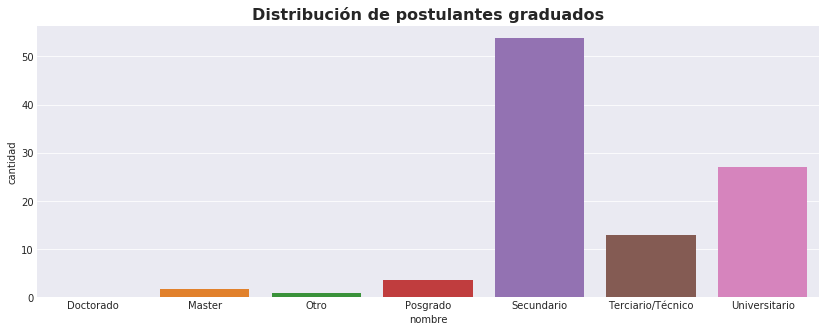

In [132]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes graduados', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=plot_postulantes_graduados)

In [133]:
postulantes_en_curso = postulantes
postulantes_en_curso['cantidad'] = 0
postulantes_en_curso= postulantes.loc[(postulantes['estado']=='En Curso')].groupby('nombre').count()

In [134]:
del postulantes_en_curso['idpostulante']
del postulantes_en_curso['estado']
del postulantes_en_curso['fechanacimiento']
del postulantes_en_curso['sexo']
del postulantes_en_curso['level_0']
del postulantes_en_curso['edad']

In [135]:
plot_postulantes_en_curso = 100 * postulantes_en_curso['cantidad']/len(postulantes.loc[(postulantes['estado']=='En Curso')])
plot_postulantes_en_curso = pd.DataFrame(plot_postulantes_en_curso).reset_index()

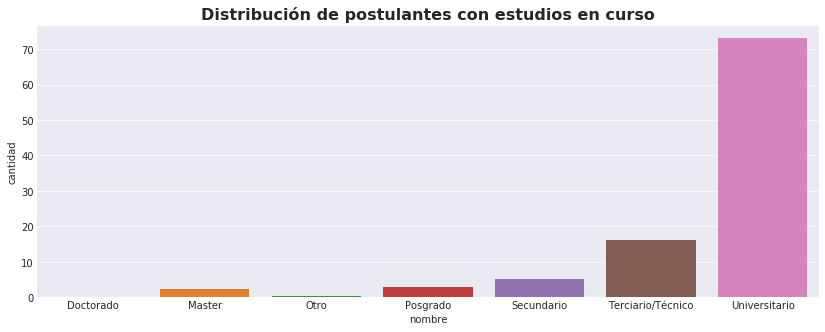

In [136]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes con estudios en curso', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=plot_postulantes_en_curso)

In [137]:
postulantes_abandonado = postulantes
postulantes_abandonado['cantidad'] = 0
postulantes_abandonado= postulantes.loc[(postulantes['estado']=='Abandonado')].groupby('nombre').count()

In [138]:
del postulantes_abandonado['idpostulante']
del postulantes_abandonado['estado']
del postulantes_abandonado['fechanacimiento']
del postulantes_abandonado['sexo']
del postulantes_abandonado['level_0']
del postulantes_abandonado['edad']

In [139]:
postulantes_abandonado = 100 * postulantes_abandonado['cantidad']/len(postulantes.loc[(postulantes['estado']=='En Curso')])
postulantes_abandonado = pd.DataFrame(postulantes_abandonado).reset_index()

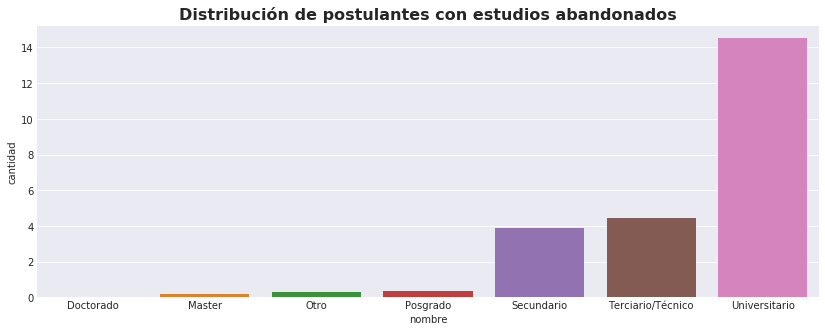

In [140]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes con estudios abandonados', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=postulantes_abandonado)